In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense
from keras.optimizers import RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam, SGD
from keras.layers import Conv1D, Flatten, LSTM, Reshape, BatchNormalization, Activation, UpSampling1D, ZeroPadding1D, PReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bd_data=[]
bv_data=[]
ba_data=[]
eq_data=[]
list1=os.listdir(r"/content/drive/MyDrive/Major Project/New/Data/dat2")
for filename in list1:
  filepath=os.path.join(r"/content/drive/MyDrive/Major Project/New/Data/dat2",filename)
  for i in os.listdir(filepath):
    if i.startswith('DFree'):
      disp=np.genfromtxt(os.path.join(filepath,i),skip_header=10,usecols=(1,2,3,4,5,6))
      disp=disp[0:800,:]
      bd_data.append(disp)
    if i.startswith('VFree'):
      vel=np.genfromtxt(os.path.join(filepath,i),skip_header=10,usecols=(1,2,3,4,5,6))
      vel=vel[0:800,:]
      bv_data.append(vel)
    if i.startswith('AFree'):
      acel=np.genfromtxt(os.path.join(filepath,i),skip_header=10,usecols=(1,2,3,4,5,6))
      acel=disp[0:800,:]
      ba_data.append(acel)

list2=os.listdir(r"/content/drive/MyDrive/Major Project/New/Data/earth_quake2/EQ")
for filename in list2:
  filepath=os.path.join(r"/content/drive/MyDrive/Major Project/New/Data/earth_quake2/EQ",filename)
  eq=np.genfromtxt(filepath)
  eq=eq[0:800,]
  eq_data.append(eq)

bd_data=np.array(bd_data)
bv_data=np.array(bv_data)
ba_data=np.array(ba_data)    
eq_data=np.array(eq_data)      
eq_data=eq_data.reshape(20,800,1)      
      


In [4]:
print(f"Shape of displacement data loaded is\t\t {bd_data.shape}")
print(f"Shape of velocity data loaded is\t\t {bv_data.shape}")
print(f"Shape of accelaration data loaded is\t\t {ba_data.shape}")
print(f"Shape of ground accelaration data loaded is\t {eq_data.shape}")


Shape of displacement data loaded is		 (20, 800, 6)
Shape of velocity data loaded is		 (20, 800, 6)
Shape of accelaration data loaded is		 (20, 800, 6)
Shape of ground accelaration data loaded is	 (20, 800, 1)


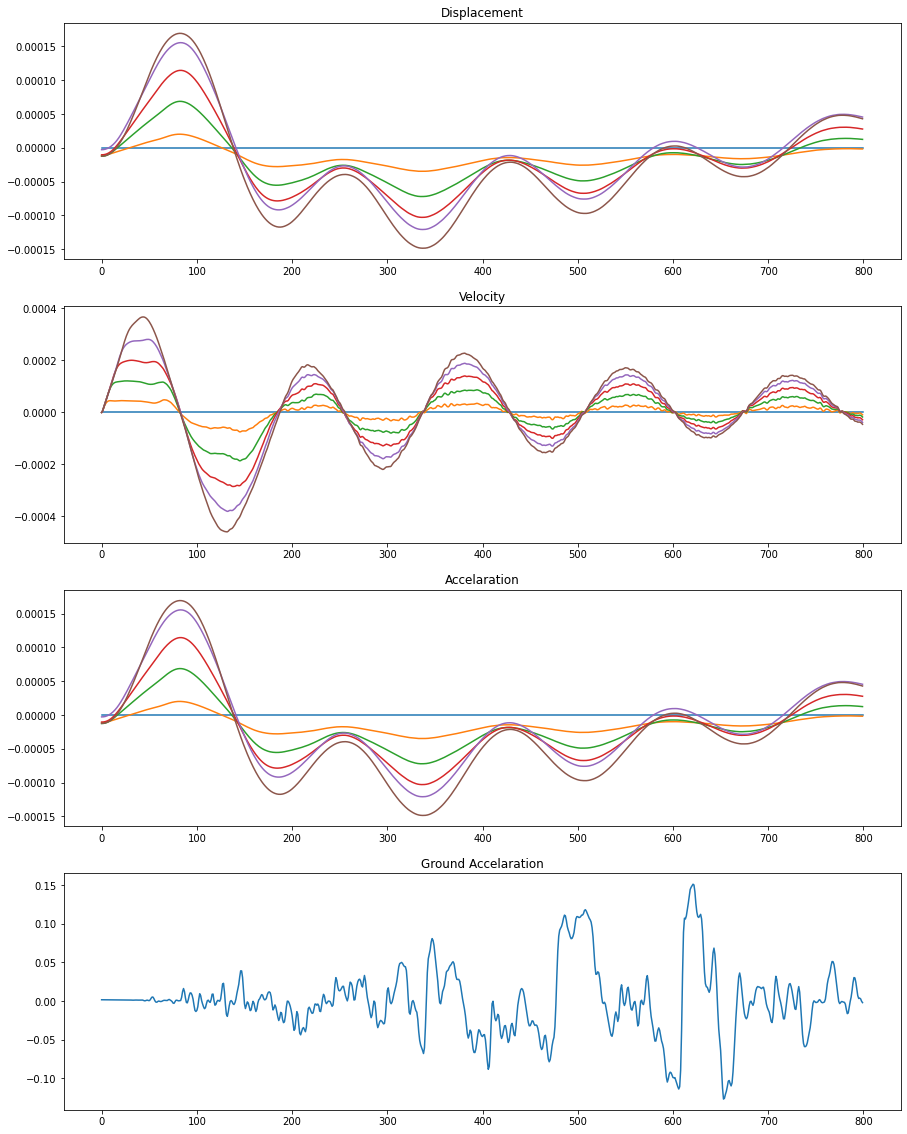

In [5]:
fig=plt.figure(figsize=(15,20))
ax1=plt.subplot(4,1,1)
ax1.set_title("Displacement")
ax1.plot(bd_data[1,:,:])
ax2=plt.subplot(4,1,2)
ax2.set_title("Velocity")
ax2.plot(bv_data[1,:,:])
ax3=plt.subplot(4,1,3)
ax3.set_title("Accelaration")
ax3.plot(ba_data[1,:,:])
ax4=plt.subplot(4,1,4)
ax4.set_title("Ground Accelaration")
ax4.plot(eq_data[1,:,:])
plt.show()

In [6]:
model = Sequential()
model.add(Conv1D(64, 50, strides=1, padding='same', use_bias=True, input_shape=(800, 1)))
model.add(Activation('relu'))
model.add(Conv1D(64, 50, strides=1, padding='same', use_bias=True))
model.add(Activation('relu'))
model.add(Conv1D(64, 50, strides=1, padding='same', use_bias=True))
model.add(Activation('relu'))
model.add(Conv1D(64, 50, strides=1, padding='same', use_bias=True))
model.add(Activation('relu'))
model.add(Conv1D(64, 50, strides=1, padding='same', use_bias=True))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 800, 64)           3264      
_________________________________________________________________
activation (Activation)      (None, 800, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 800, 64)           204864    
_________________________________________________________________
activation_1 (Activation)    (None, 800, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 800, 64)           204864    
_________________________________________________________________
activation_2 (Activation)    (None, 800, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 800, 64)           2

In [7]:
model.compile(optimizer='Adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [11]:
x_train=eq_data[0:15,:,:]
y_train=ba_data[0:15,:,5:]
x_test=eq_data[15:20,:,:]
y_test=ba_data[15:20,:,5:]

In [12]:
# from sklearn import preprocessing
# for i in range(len(x_train)):
#     x_train[i,:,:]=preprocessing.normalize(x_train[i,:,:])
#     y_train[i,:,:]=preprocessing.normalize(y_train[i,:,:])

In [13]:
print(f"Shape of xtrain is\t\t {x_train.shape}")
print(f"Shape of ytrain is\t\t {y_train.shape}")
print(f"Shape of xtest is\t\t {x_test.shape}")
print(f"Shape of ytest is\t\t {y_test.shape}")

Shape of xtrain is		 (15, 800, 1)
Shape of ytrain is		 (15, 800, 1)
Shape of xtest is		 (5, 800, 1)
Shape of ytest is		 (5, 800, 1)


In [14]:
history=model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 18s 18s/step - loss: 0.0148 - mean_absolute_error: 0.0148
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0216 - mean_absolute_error: 0.0216
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0151 - mean_absolute_error: 0.0151
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0213 - mean_absolute_error: 0.0213
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0179 - mean_absolute_error: 0.0179
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0154 - mean_absolute_error: 0.0154
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0152 - mean_absolute_error: 0.0152
Epoch 8/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0153 - mean_absolute_error: 0.0153
Epoch 9/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0151 - mean_absolute_error: 0.0151
Epoch 10/1000
1/1 [=======

KeyboardInterrupt: ignored

In [15]:
ypred=model.predict(x_test)

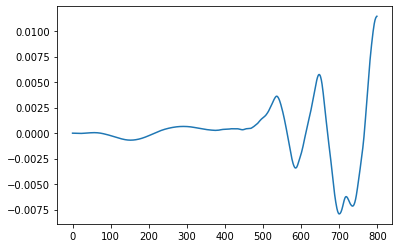

In [19]:
plt.figure()
plt.plot(y_test[2,:,0])
# plt.plot(ypred[2,:,0])
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error'])


<Figure size 432x288 with 0 Axes>

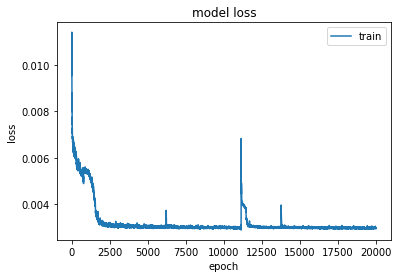

In [ ]:
plt.figure()

plt.figure()
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()